In [202]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc
from lightgbm import LGBMClassifier 
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

In [203]:
train_data = pd.read_csv('train.csv', index_col = 'id')
test_data = pd.read_csv('test.csv', index_col = 'id')
combined = [train_data, test_data]


In [204]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [205]:
train_data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [206]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127037 entries, 381110 to 508146
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 10.7+ MB


In [207]:
train_data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [208]:
cat_features = train_data.select_dtypes(['object']).columns
cat_features

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [209]:
for col in cat_features:
    print(train_data[col].nunique())

2
3
2


In [210]:
le  = LabelEncoder()
for col in cat_features:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

In [211]:
train_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 34.9 MB


In [212]:
train_data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.540761,38.822584,0.997869,26.388807,0.458210,0.516388,0.504877,30564.389581,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.577698,0.499977,17213.155057,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [213]:
train_data['Age'].nunique()

66

In [214]:
sc = StandardScaler()
col = 'Age'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [215]:
train_data['Driving_License'].nunique()

2

In [216]:
train_data['Region_Code'].nunique()

53

In [217]:
train_data['Previously_Insured'].nunique()

2

In [218]:
train_data['Vehicle_Damage'].nunique()

2

In [219]:
train_data['Annual_Premium'].nunique()

48838

In [220]:
sc  = StandardScaler()
col = 'Annual_Premium'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [221]:
train_data['Policy_Sales_Channel'].nunique()

155

In [222]:
mms = MinMaxScaler()
col = 'Policy_Sales_Channel'
train_data[col] = mms.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = mms.fit_transform(test_data[col].values.reshape(-1,1))

In [223]:
sc  = StandardScaler()
col = 'Policy_Sales_Channel'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [224]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,0.333777,1,28.0,0,2,1,0.574539,-1.587234,217,1
2,1,2.396751,1,3.0,0,0,0,0.172636,-1.587234,183,0
3,1,0.527181,1,28.0,0,2,1,0.449053,-1.587234,27,1
4,1,-1.148985,1,11.0,1,1,0,-0.113018,0.737321,203,0
5,0,-0.633242,1,41.0,1,1,0,-0.178259,0.737321,39,0


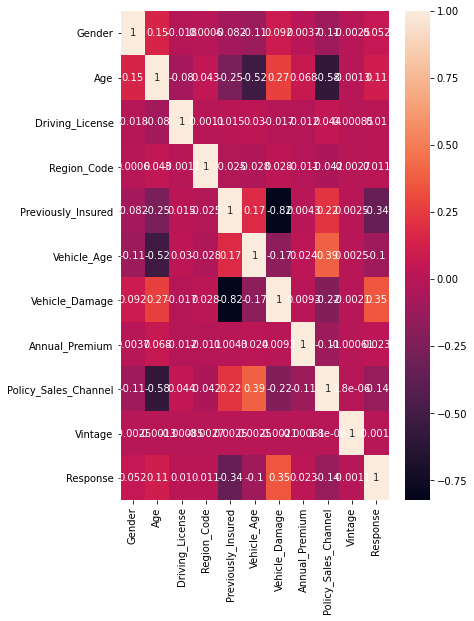

In [225]:
plt.figure(figsize = (6,9))
sns.heatmap(train_data.corr(),annot = True, cbar = True)
plt.show()

In [226]:
y = train_data.loc[:,'Response']
X = train_data.drop('Response', axis = 1)
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
1,1,0.333777,1,28.0,0,2,1,0.574539,-1.587234,217
2,1,2.396751,1,3.0,0,0,0,0.172636,-1.587234,183
3,1,0.527181,1,28.0,0,2,1,0.449053,-1.587234,27
4,1,-1.148985,1,11.0,1,1,0,-0.113018,0.737321,203
5,0,-0.633242,1,41.0,1,1,0,-0.178259,0.737321,39
...,...,...,...,...,...,...,...,...,...,...
381105,1,2.267815,1,26.0,1,0,0,-0.022912,-1.587234,88
381106,1,-0.568774,1,37.0,1,1,0,0.549093,0.737321,131
381107,1,-1.148985,1,30.0,1,1,0,0.264543,0.884912,161


In [227]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [177]:
params={
 "learning_rate"    : [0.01, 0.02,0.03,0.04,0.05,0.06,0.8,1 ] ,
 "reg_lambda"       : [1,2,3,4,5,6,7],
 "n_estimators"     : [200, 300, 400, 500, 600, 700,800],
 "max_depth"        : [2, 3, 4, 5, 6,7, 8,9, 10,11, 12,13,14, 15],
 "reg_alpha"        : [1,2,3,4,5,6,7],
 
 "min_child_weight" : [ 0.001,0.005,0.009,0.005,0.01,0.02,0.04,0.07,0.1,0.5,1,5,8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9 ],
 "colsample_bytree" : [ 0.05,0.1,0.2,0.3, 0.4, 0.5 ,0.6, 0.7 ]
    
}

In [178]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [228]:
classifier=LGBMClassifier()


In [180]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=20,scoring='roc_auc',n_jobs=-1,cv=8,verbose=3)

In [132]:
start_time = timer(None) 
random_search.fit(x_train,y_train)
timer(start_time)

Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 20.0min finished



 Time taken: 0 hours 20 minutes and 12.32 seconds.


In [181]:
random_search.best_estimator_

AttributeError: ignored

In [134]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.9,
 'learning_rate': 0.03,
 'max_depth': 14,
 'min_child_weight': 0.01,
 'n_estimators': 400,
 'reg_alpha': 1,
 'reg_lambda': 2}

In [242]:
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               gamma=1, importance_type='split', learning_rate=0.04,
               max_depth=14, min_child_samples=20, min_child_weight=0.01,
               min_split_gain=0.0, n_estimators=800, n_jobs=-1,is_unbalance = True, num_leaves=31,
               objective='binary',metric = 'auc', random_state=294, reg_alpha=1, reg_lambda=2,
               silent=True, subsample=1.0,njobs = -1, subsample_for_bin=200000,
               subsample_freq=0)
clf = model.fit(x_train, y_train)

In [243]:
roc_auc_score(y_train, clf.predict(x_train))

0.8125720184262303

In [244]:
roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

0.8583839324950141

In [245]:
y_pred = clf.predict_proba(test_data)[:,1]

In [246]:
sub = pd.DataFrame(y_pred,columns = ['Response'],index = [i + 381110 for i in range(test_data.shape[0])])

sub.index.name = 'id'
sub.tail()

,Response
id,
508142,0.001464
508143,0.832655
508144,0.001153
508145,0.000903
508146,0.006962


In [247]:
sub.to_csv('sub4.csv')